#  Customer Churn Prediction 

**Objective:** Predict whether a customer is likely to leave (churn) based on their demographics, account details, and service usage patterns.

**Dataset:** [Telco Customer Churn Dataset - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Key Steps:**
- Data exploration & preprocessing
- Handling class imbalance
- Feature engineering & selection
- Model training & evaluation
- Insights & recommendations for churn reduction


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math


In [104]:
df = pd.read_csv("customer_churn.csv")

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [107]:
df = df.drop(columns = 'customerID')
for c in df:
    print(df[c].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [108]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [110]:
print(f"Duplicates before dropping :",df.duplicated().sum() )

df = df.drop_duplicates()

print(f"Duplicates After dropping :",df.duplicated().sum() )

Duplicates before dropping : 22
Duplicates After dropping : 0


Churn
No     5164
Yes    1857
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

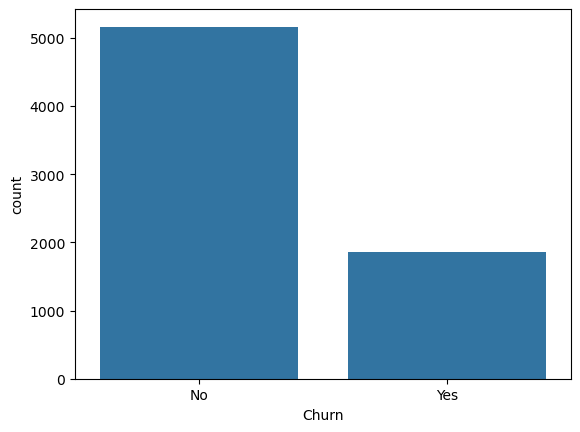

In [111]:
# Look for Target imbalance

print(df['Churn'].value_counts())

sns.countplot(data=df, x='Churn' )

###  Class Imbalance in Target Variable

The target variable **Churn** is imbalanced:

| Churn | Count | Percentage |
|-------|-------|------------|
| No    | 5,164 | 73.5%      |
| Yes   | 1,857 | 26.5%      |

This imbalance means that the dataset contains significantly more customers who stayed than those who churned.  
To address this during model training, techniques such as **class weighting**, **oversampling (SMOTE)**, or **undersampling** will be considered.  
Evaluation metrics like **Recall**, **Precision**, **F1-score**, and **ROC-AUC** will be prioritized over Accuracy to ensure fair performance on both classes.


In [112]:
# Total charges and Montly charges to " Int "
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [113]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [114]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [115]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA (Exploratory Data Analysis)
---
#### Univarite Analysis

In [116]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})
df_num = df.select_dtypes(include=['int','float']).columns.tolist()
df_cat = df.select_dtypes(include='object').columns.tolist()

#### Univariate Analysis for numeric variables

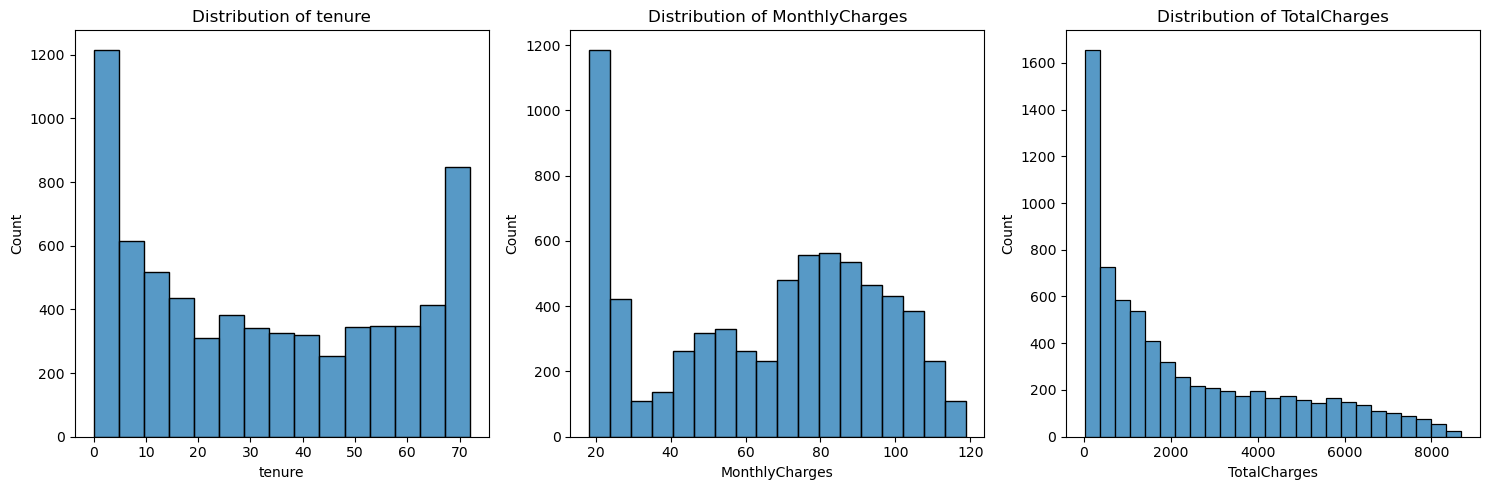

In [117]:
import math
n_cols = 3
n_rows = math.ceil(len(df_num)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=( n_cols *5, n_rows *5 )  )
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.histplot(data =df, x= col, ax=axes[i] )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Numerical Variable Insights

The following histograms display the distribution of key numerical features in the dataset:

- **Tenure**: Bimodal distribution, with peaks at low values (1–5 months) and high values (~65–70 months).  
- **MonthlyCharges**: Bimodal distribution, with peaks around $20–$25 and $70–$100, indicating two major service plan segments.  
- **TotalCharges**: Right-skewed distribution, with most customers in the low-to-mid range and a long tail toward higher values, driven by customers with long tenure and higher monthly charges.

These patterns suggest the presence of distinct customer groups, which may influence churn behavior.  
The bimodal distributions indicate segmentation in both contract duration and pricing, while the skew in TotalCharges reflects the cumulative nature of the billing.


#### Univarite Analyis for categorical variables

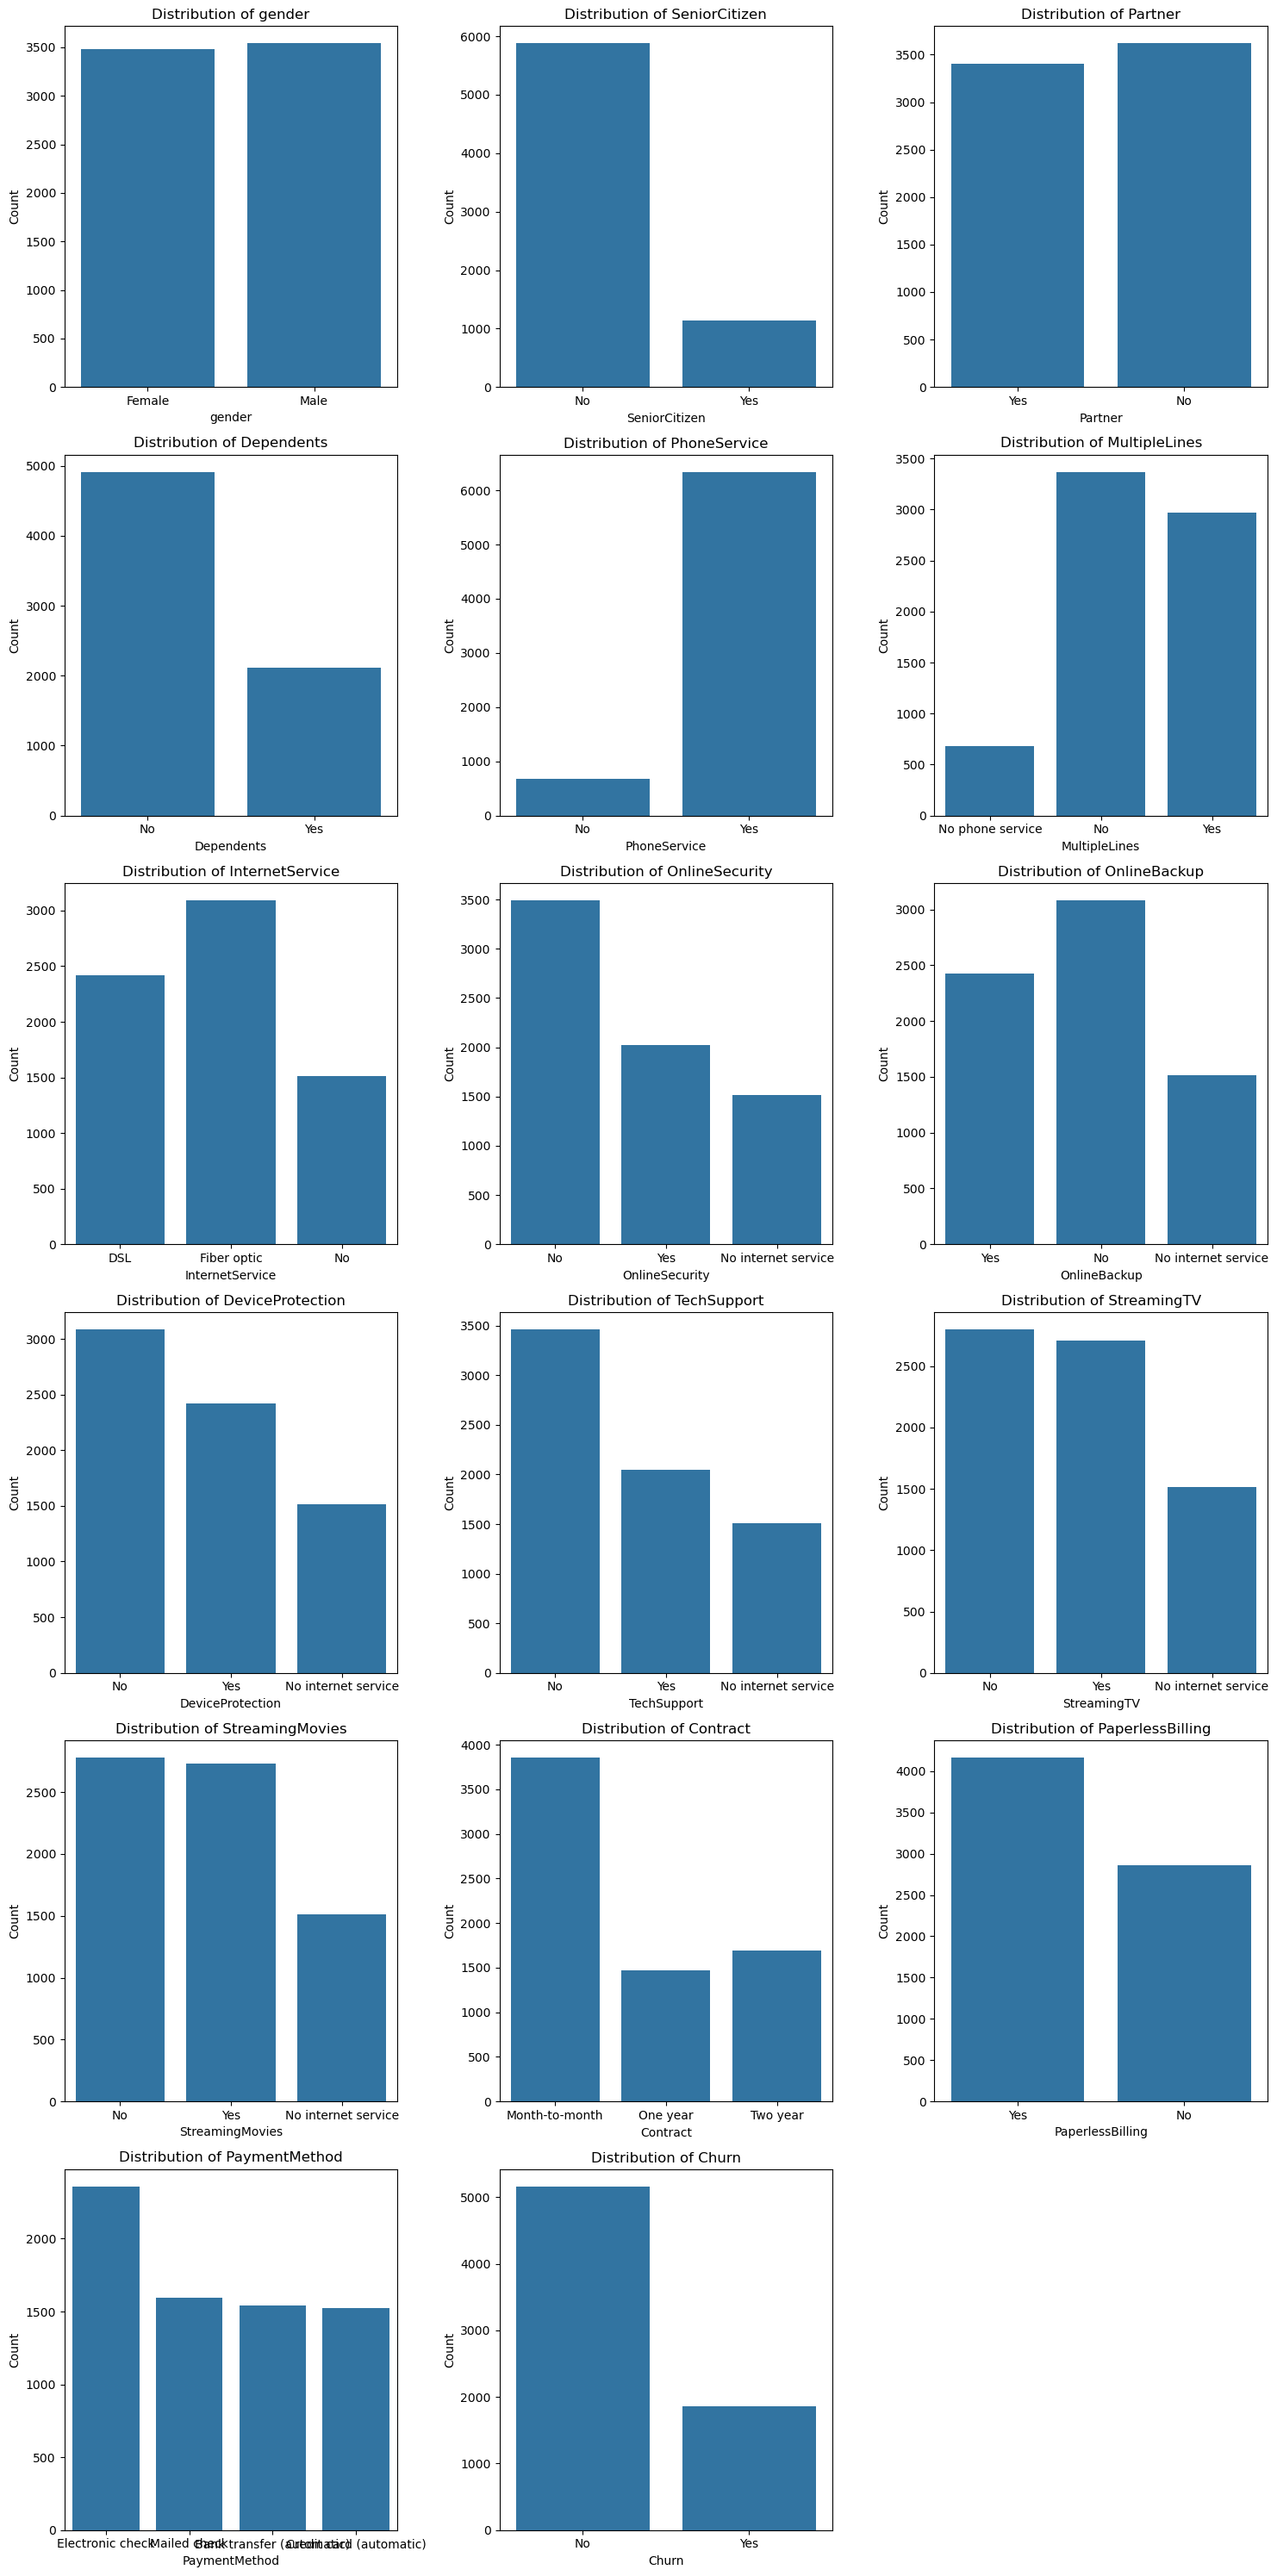

In [118]:

n_cols = 3
n_rows = math.ceil(len(df_cat)/ n_cols)

fig,axes = plt.subplots( n_rows, n_cols , figsize=(n_cols *5 , n_rows *5) )
ax = axes .flatten()

for i,col in enumerate(df_cat):
    sns.countplot(data=df, x= col, ax= ax[i] )
    ax[i].set_title(f"Distribution of {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show() 


### Categorical Variable Insights

- **Gender**: Customer base is evenly distributed between male and female subscribers, indicating no gender bias in service adoption.  
- **SeniorCitizen**: Only a small proportion of customers are senior citizens, suggesting that the majority of the customer base is younger.  
- **Partner**: Nearly equal representation of customers with and without partners.  
- **Dependents**: A larger share of customers do not have dependents, indicating that many subscribers are likely single or without family obligations.  
- **PhoneService**: The vast majority of customers have an active phone service plan.  
- **MultipleLines**: Customers are fairly evenly split between having multiple lines, a single line, or no phone service.  
- **InternetService**: Most customers subscribe to an internet plan, with DSL and fiber optic services having similar representation; a smaller segment has no internet service.  
- **OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport**: Across these add-on services, “No” is the most common response, indicating lower adoption rates for optional security and support services.  
- **StreamingTV / StreamingMovies**: Customers are fairly evenly distributed between having and not having streaming services; the “No internet service” group forms the smallest segment.  
- **Contract**: Month-to-month contracts dominate, with fewer customers on one-year and two-year terms.  
- **PaperlessBilling**: A majority opt for paperless billing, but a substantial proportion still prefer physical billing.  
- **PaymentMethod**: Electronic check is the most common payment method, followed by mailed check, bank transfer, and credit card payments.  
- **Churn**: The majority of customers have not churned; however, a significant minority (~26.5%) have left the service.


### Outlier detection

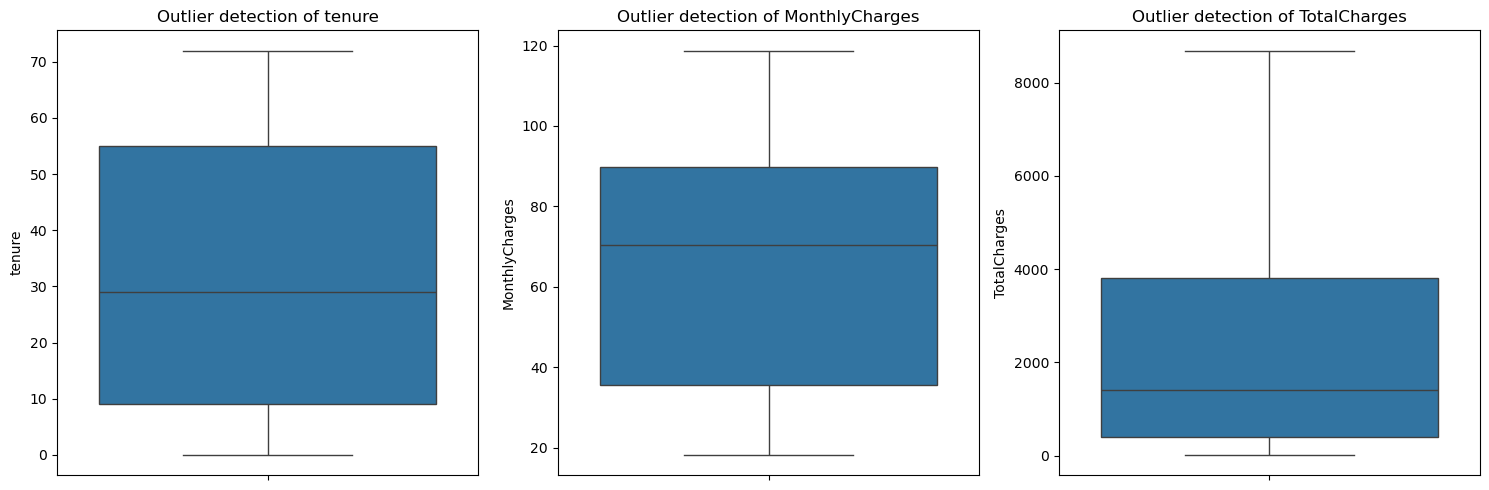

In [119]:

n_cols = 3

n_rows = math.ceil(len(df_num)/ n_cols)

fig,axes = plt.subplots( n_rows , n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

for i , col in enumerate(df_num):
    sns.boxplot(y=df[col], ax = axes[i] )
    axes[i].set_title(f"Outlier detection of {col}")
    axes[i].set_ylabel(col)
   

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



`Tenure` → Evenly distributed from 0 to 72, no extreme values beyond range.

`MonthlyCharges` → Stays within ~$18 to ~$120 — no extreme spikes.

`TotalCharges` → Naturally right-skewed due to tenure, but still within expected bounds for the service length and charges — no anomalous points.

---
### Bivariate Analysis

 - Numerical Vs Target(Churn)

In [120]:
df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.640782,61.344878,2559.689173
Yes,18.088853,74.604308,1541.376548


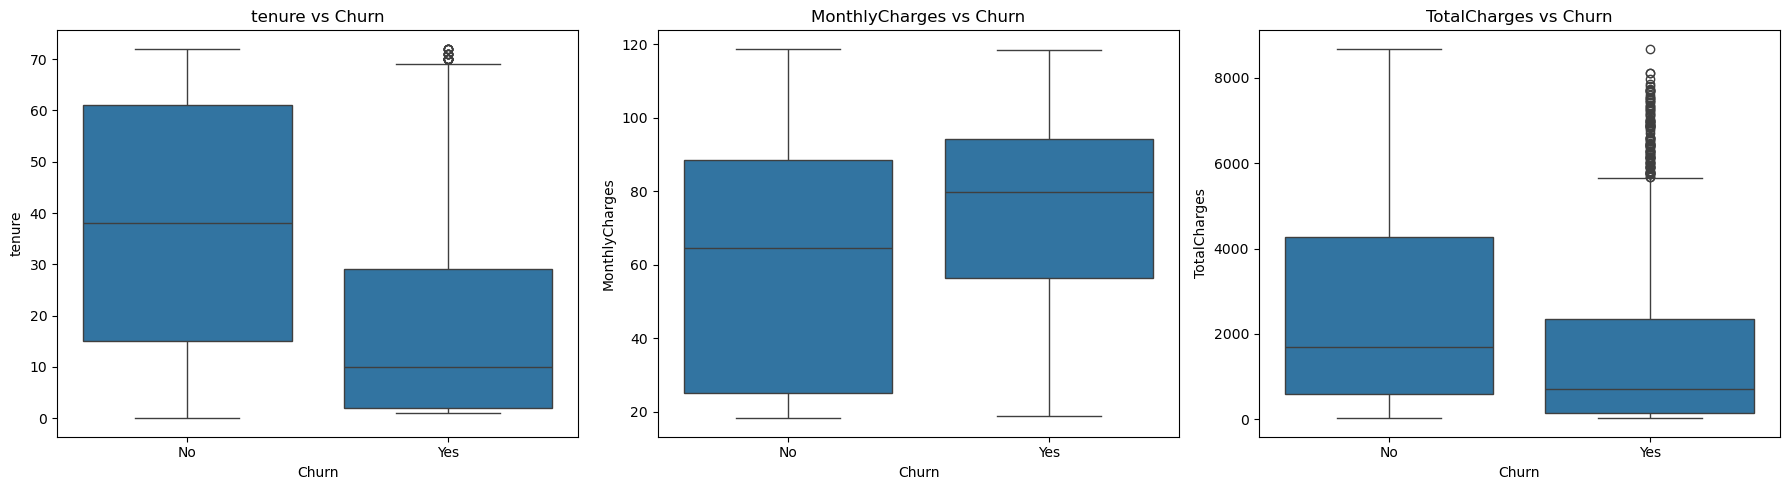

In [121]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Numerical Variables vs Churn – Key Insights

- **Tenure**: Customers who churn tend to have significantly lower tenure compared to those who stay, indicating that churn is more common among newer customers.  
- **MonthlyCharges**: Customers who churn generally have higher monthly charges compared to non-churned customers.  
- **TotalCharges**: Customers who churn have considerably lower total charges, likely due to their shorter tenure, while non-churned customers have a wider range of total charges with higher median values.


---
- Categorical vs Target(Churn)

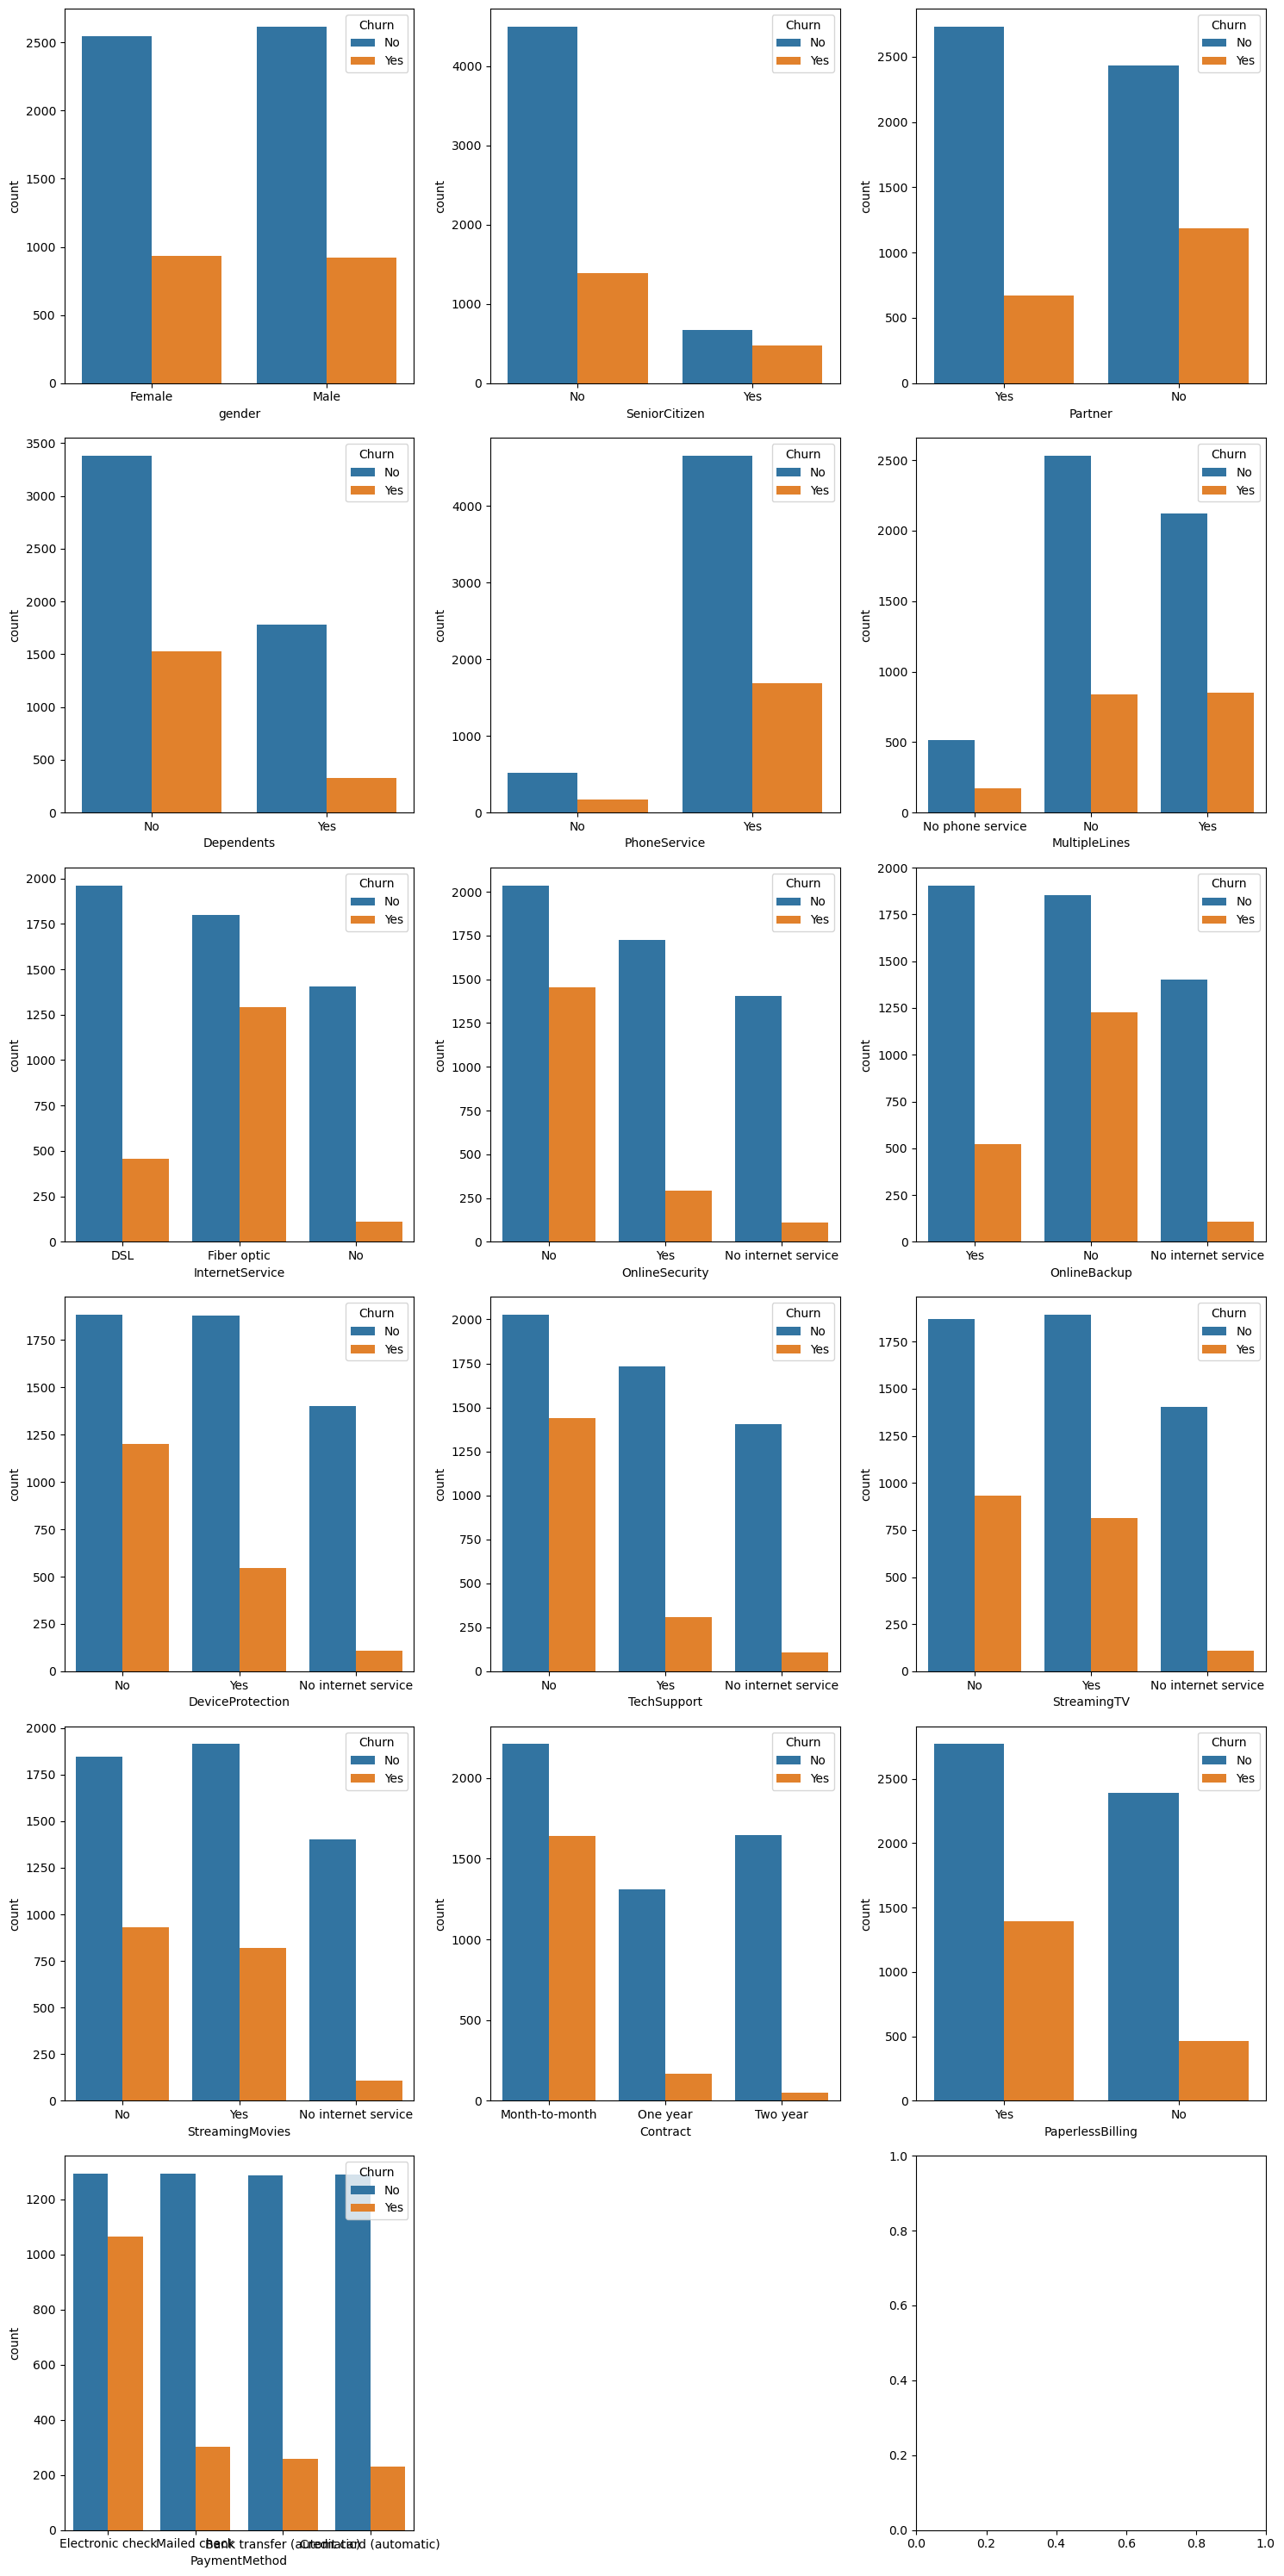

In [122]:
n_cols  = 3
n_rows = math.ceil(len(df_cat)/ n_cols)

fig,axes = plt.subplots(n_rows , n_cols , figsize=( n_cols*5, n_rows*5))
ax = axes.flatten()

for i ,col in enumerate(df_cat):
    sns.countplot(data =df, x = col, hue='Churn', ax=ax[i] )
    

for j in range(i+1, len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

### Categorical Variables vs Churn – Key Insights

- **Gender**: Churn rate is similar for both male and female customers.  
- **SeniorCitizen**: Senior citizens have a visibly higher churn rate compared to non-senior customers.  
- **Partner**: Customers without a partner are more likely to churn.  
- **Dependents**: Customers without dependents are more likely to churn.  
- **PhoneService**: Churn rate is slightly higher among customers with phone service, though the difference is small.  
- **MultipleLines**: No significant churn difference between customers with multiple lines and those with a single line.  
- **InternetService**: Fiber optic customers have a much higher churn rate compared to DSL users; customers without internet service have very low churn.  
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: Customers without these add-on services have higher churn, suggesting these features may improve retention.  
- **StreamingTV, StreamingMovies**: Churn differences are less pronounced, but customers without internet service show low churn by default.  
- **Contract**: Month-to-month customers have the highest churn, while two-year contract customers have the lowest churn.  
- **PaperlessBilling**: Customers with paperless billing have a slightly higher churn rate.  
- **PaymentMethod**: Electronic check users have the highest churn rate; other payment methods are associated with lower churn rates.


<Axes: >

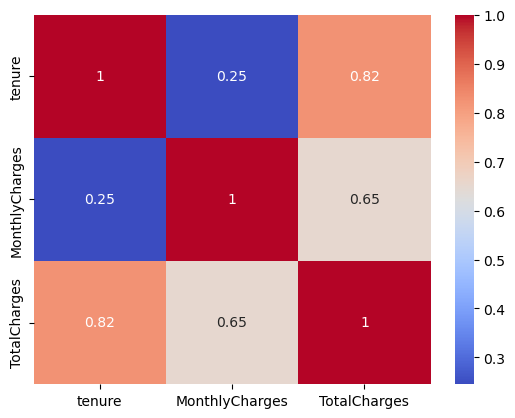

In [123]:

sns.heatmap(df[df_num].corr(), annot=True,cmap='coolwarm' )

### Correlation Heatmap – Numerical Variables

- **Tenure & TotalCharges**: Strong positive correlation (**0.82**). Customers who stay longer accumulate higher total charges.  
- **MonthlyCharges & TotalCharges**: Moderate positive correlation (**0.65**). Higher monthly bills generally lead to higher total charges.  
- **Tenure & MonthlyCharges**: Weak correlation (**0.25**). Monthly charges do not strongly depend on how long a customer has stayed.


In [124]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


X = df.drop(columns = 'Churn')
y = df['Churn'].map({"Yes":1, "No":0})

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2)



In [125]:
X_num = X.select_dtypes(include=['int','float']).columns
X_cat = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),X_num),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), X_cat )
    ]
)

In [126]:
# DF example
X_transformed_df = pd.DataFrame(
    preprocessor.fit_transform(X).toarray() 
        if hasattr(preprocessor.fit_transform(X), "toarray") 
        else preprocessor.fit_transform(X),
    columns=preprocessor.get_feature_names_out()
)
X_transformed_df.head()



,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__gender_Male,cat__SeniorCitizen_Yes,cat__Partner_Yes,cat__Dependents_Yes,cat__PhoneService_Yes,cat__MultipleLines_No phone service,cat__MultipleLines_Yes,...,cat__StreamingTV_No internet service,cat__StreamingTV_Yes,cat__StreamingMovies_No internet service,cat__StreamingMovies_Yes,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_Yes,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check
0,-1.282728,-1.164135,-0.998066,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062387,-0.262811,-0.176986,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.241967,-0.365914,-0.963495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.510759,-0.750058,-0.198511,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.241967,0.194503,-0.944289,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


ROC-AUC: 0.8449074074074072
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.72      0.80      1053
           1       0.49      0.81      0.61       352

    accuracy                           0.74      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.81      0.74      0.75      1405



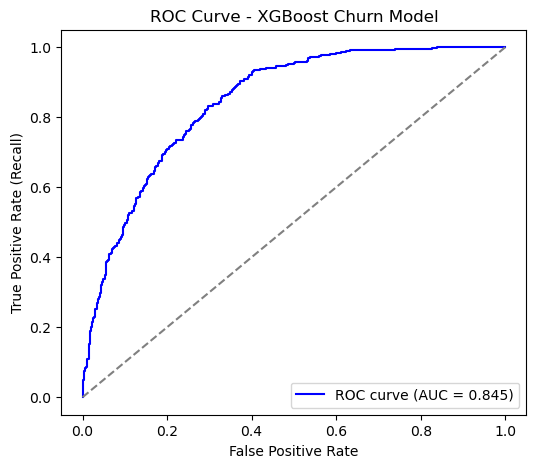

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,classification_report, confusion_matrix, confusion_matrix, roc_auc_score,roc_curve

pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('logistic regression', LogisticRegression( class_weight='balanced', max_iter=200 ) )
    ]
)

pipe_lr.fit(X_train,y_train)

y_pred_lr = pipe_lr.predict(X_test)



y_pred_xgb = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:, 1]  # model is your trained XGB pipeline

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

print(f"Classification Report:", classification_report(y_test,y_pred_lr))

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost Churn Model')
plt.legend(loc="lower right")
plt.show()



ROC-AUC: 0.8019025727359061
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1053
           1       0.54      0.47      0.50       352

    accuracy                           0.77      1405
   macro avg       0.69      0.67      0.68      1405
weighted avg       0.76      0.77      0.76      1405



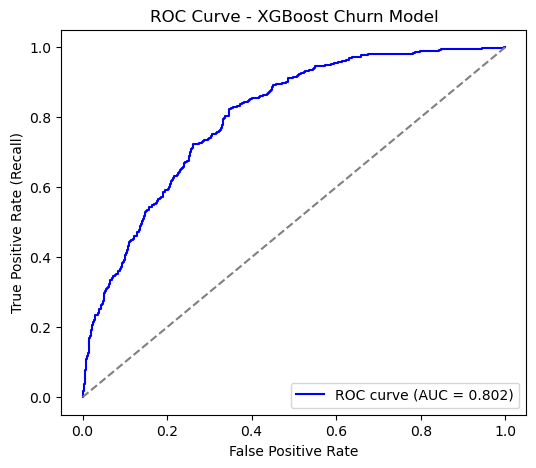

In [133]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('xgb', XGBClassifier( 
    learobjective="binary:logistic",
    eval_metric="auc",
    learning_rate=0.05,
    n_estimators=2000,              # rely on early stopping
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.0,
    reg_lambda=5.0,
    reg_alpha=0.0,
 
    n_jobs=-1,
    random_state=42,
    tree_method="hist"   ) )
    ]
)

pipe_xgb.fit(X_train,y_train)

y_pred_xgb = pipe_xgb.predict(X_test)
y_proba = pipe_xgb.predict_proba(X_test)[:, 1]  # model is your trained XGB pipeline

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)
# print(f"Accuracy Report: ",accuracy_score(y_test,y_pred_xgb) )
# print(f"MSE: ",mean_squared_error(y_test,y_pred_xgb) )
# print(f"R2 : ",r2_score(y_test,y_pred_xgb) )
print(f"Classification Report:", classification_report(y_test,y_pred_xgb))


# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost Churn Model')
plt.legend(loc="lower right")
plt.show()
